# Nutri-Score Prediction: EDA, Preprocessing, and Model Training (Notebook 2)



## Import Libraries

In this section, we will import the necessary Python libraries required for data loading, exploration, and preprocessing. These libraries will include tools for data manipulation, visualization, and initial setup for model training.


In [1]:
# Import essential libraries for data manipulation and visualization
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.display import display
# Import libraries for data preprocessing and modeling
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from scipy import stats


## Load the Data and Create DataFrame

Here, we will load our prepared CSV file, `df_reduced_2.csv`, into a DataFrame for further analysis. 


In [2]:

# Function to load selected features from CSV and save as new CSV
def load_and_save_selected_features(file_path, output_path):
    selected_columns = [
        'nutrition-score-fr_100g', 'energy-kcal_100g', 'fat_100g', 'saturated-fat_100g',
        'carbohydrates_100g', 'sugars_100g', 'fiber_100g', 'proteins_100g', 'salt_100g',
        'fruits-vegetables-nuts-estimate-from-ingredients_100g', 'nutriscore_grade',
        'pnns_groups_1', 'pnns_groups_2', 'food_groups', 'categories'
    ]

    # Load the CSV with only the selected columns
    df_reduced_2 = pd.read_csv(file_path, usecols=selected_columns)

    # Save the new DataFrame to a CSV file
    output_file_path = f"{output_path}/df_reduced_2.csv"
    df_reduced_2.to_csv(output_file_path, index=False)
    return df_reduced_2, output_file_path

# call the function
file_path = "C:/data/simplon_dev_ia_projects/flask_projects/nutriscore_prediction_app/data/cleaned_df_4.csv"  # Replace with actual path to your CSV
output_path = "C:/data/simplon_dev_ia_projects/flask_projects/nutriscore_prediction_app/data"  # Replace with desired output directory
df_reduced_2, output_file_path = load_and_save_selected_features(file_path, output_path)
print(f"CSV saved at: {output_file_path}")



'\'\n# Function to load selected features from CSV and save as new CSV\ndef load_and_save_selected_features(file_path, output_path):\n    selected_columns = [\n        \'nutrition-score-fr_100g\', \'energy-kcal_100g\', \'fat_100g\', \'saturated-fat_100g\',\n        \'carbohydrates_100g\', \'sugars_100g\', \'fiber_100g\', \'proteins_100g\', \'salt_100g\',\n        \'fruits-vegetables-nuts-estimate-from-ingredients_100g\', \'nutriscore_grade\',\n        \'pnns_groups_1\', \'pnns_groups_2\', \'food_groups\', \'categories\'\n    ]\n\n    # Load the CSV with only the selected columns\n    df_reduced_2 = pd.read_csv(file_path, usecols=selected_columns)\n\n    # Save the new DataFrame to a CSV file\n    output_file_path = f"{output_path}/df_reduced_2.csv"\n    df_reduced_2.to_csv(output_file_path, index=False)\n    return df_reduced_2, output_file_path\n\n# call the function\nfile_path = "C:/data/simplon_dev_ia_projects/flask_projects/nutriscore_prediction_app/data/cleaned_df_4.csv"  # Replac

### Load and Preview the Reduced DataFrame

Now, we will load the `df_reduced_2.csv` file, which contains our selected features, into a DataFrame. After loading, we’ll preview the first few rows to confirm the data structure and ensure that the file was loaded correctly.


In [3]:

# Define the file path for the CSV
file_path = "C:/data/simplon_dev_ia_projects/flask_projects/nutriscore_prediction_app/data/df_reduced_2.csv"

# Load the CSV file into a DataFrame
df_reduced_2 = pd.read_csv(file_path)

# Preview the first five rows of the DataFrame
df_reduced_2.head()


,categories,nutriscore_grade,pnns_groups_1,pnns_groups_2,food_groups,energy-kcal_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,fruits-vegetables-nuts-estimate-from-ingredients_100g,nutrition-score-fr_100g
0,Proteinpulver,d,NaN,NaN,NaN,406.0000,6.600000,4.300000,6.70000,6.70000,NaN,80.000000,0.500000,0.013317,12.0
1,Dark chocolate bar,e,Sugary snacks,Chocolate products,en:chocolate-products,578.0000,40.900000,21.500000,40.70000,35.00000,8.400000,7.500000,0.000000,12.000000,19.0
2,Gemüse,a,Fruits and vegetables,Vegetables,en:vegetables,208.0000,0.000000,0.000000,8.00000,8.00000,88.000000,0.000000,0.230000,50.000000,-2.0
3,"Beverages and beverages preparations, Plant-ba...",e,Beverages,Artificially sweetened beverages,en:artificially-sweetened-beverages,85.0000,2.400000,1.100000,9.60000,2.20000,1.300000,5.700000,1.181102,0.000000,17.0
4,Protein Powder,d,NaN,NaN,NaN,536.0715,35.714284,8.928572,46.42857,28.57143,10.714286,10.714286,0.089286,NaN,15.0


### Preview the Entire DataFrame

To gain a comprehensive view of the dataset, we’ll create a function that displays the entire DataFrame. This function will print all rows and columns, allowing us to observe the complete structure and contents.


### Complete Data Exploration with `previsualisation` Function

This function, `previsualisation`, provides a comprehensive view of the dataset, including:
- First and last few rows to preview the data entries.
- Descriptive statistics for both numerical and categorical features.
- Column names, data types, and unique value counts.
- Missing values by count and percentage.
- Distribution of values within each column.
- Correlation matrix to understand relationships between numerical features.
- Memory usage, providing insights into the DataFrame's size and optimization opportunities.


In [4]:
from IPython.display import display

def previsualisation(df):
    """
    Provides a comprehensive overview of the DataFrame.
    """
    display("### First five rows of the DataFrame:")
    display(df.head())
    
    display("\n### Last five rows of the DataFrame:")
    display(df.tail())
    
    display("\n### Descriptive statistics (Numerical features):")
    display(df.describe())
    
    display("\n### Descriptive statistics (Categorical features):")
    display(df.describe(include='object'))
    
    display("\n### Column names, data types, and unique value counts:")
    display(pd.DataFrame({
        "Data Type": df.dtypes,
        "Unique Values": df.nunique()
    }))
    
    display("\n### Missing values (Count and Percentage):")
    missing_count = df.isnull().sum()
    missing_percentage = (missing_count / len(df)) * 100
    missing_info = pd.DataFrame({"Missing Count": missing_count, "Missing Percentage": missing_percentage})
    display(missing_info[missing_info["Missing Count"] > 0])
    
    display("\n### Value counts for each column:")
    for column in df.select_dtypes(include='object').columns:
        display(f"\nValue counts for column '{column}':")
        display(df[column].value_counts())
    
    display("\n### Correlation matrix (Numerical features only):")
    numeric_df = df.select_dtypes(include='number')  # Select only numerical columns
    display(numeric_df.corr())
    
    display("\n### Memory usage:")
    memory_usage = df.memory_usage(deep=True).sum() / (1024**2)
    display(f"{memory_usage:.2f} MB")

# Run the function to get a full overview of the DataFrame
previsualisation(df_reduced_2)


'### First five rows of the DataFrame:'

,categories,nutriscore_grade,pnns_groups_1,pnns_groups_2,food_groups,energy-kcal_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,fruits-vegetables-nuts-estimate-from-ingredients_100g,nutrition-score-fr_100g
0,Proteinpulver,d,NaN,NaN,NaN,406.0000,6.600000,4.300000,6.70000,6.70000,NaN,80.000000,0.500000,0.013317,12.0
1,Dark chocolate bar,e,Sugary snacks,Chocolate products,en:chocolate-products,578.0000,40.900000,21.500000,40.70000,35.00000,8.400000,7.500000,0.000000,12.000000,19.0
2,Gemüse,a,Fruits and vegetables,Vegetables,en:vegetables,208.0000,0.000000,0.000000,8.00000,8.00000,88.000000,0.000000,0.230000,50.000000,-2.0
3,"Beverages and beverages preparations, Plant-ba...",e,Beverages,Artificially sweetened beverages,en:artificially-sweetened-beverages,85.0000,2.400000,1.100000,9.60000,2.20000,1.300000,5.700000,1.181102,0.000000,17.0
4,Protein Powder,d,NaN,NaN,NaN,536.0715,35.714284,8.928572,46.42857,28.57143,10.714286,10.714286,0.089286,NaN,15.0


'\n### Last five rows of the DataFrame:'

,categories,nutriscore_grade,pnns_groups_1,pnns_groups_2,food_groups,energy-kcal_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,fruits-vegetables-nuts-estimate-from-ingredients_100g,nutrition-score-fr_100g
975583,"Seafood, Frozen foods, Crustaceans, Frozen sea...",b,Fish Meat Eggs,Fish and seafood,en:fish-and-seafood,247.0,14.100000,0.0,15.300000,0.0,0.0,15.3,0.647,1.577148,0.0
975584,"Snacks, Snacks sucrés, Biscuits et gâteaux, Bi...",e,Sugary snacks,Biscuits and cakes,en:biscuits-and-cakes,525.0,28.799999,18.0,60.900002,18.9,1.7,4.7,0.800,0.000000,22.0
975585,"Beverages, Carbonated drinks, Waters, Carbonat...",b,Beverages,Waters and flavored waters,en:unsweetened-beverages,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000,0.000000,0.0
975586,"Beverages, Carbonated drinks, Waters, Carbonat...",b,Beverages,Waters and flavored waters,en:unsweetened-beverages,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000,0.000000,0.0
975587,"Beverages and beverages preparations,Beverages...",b,Beverages,Waters and flavored waters,en:unsweetened-beverages,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000,0.000000,0.0


'\n### Descriptive statistics (Numerical features):'

,energy-kcal_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,fruits-vegetables-nuts-estimate-from-ingredients_100g,nutrition-score-fr_100g
count,9.410490e+05,974725.000000,952860.000000,974271.000000,967699.000000,541103.000000,974713.000000,9.752320e+05,644259.000000,975588.000000
mean,1.062644e+11,15.338968,5.666297,28.262762,13.318401,3.116900,8.530886,8.203177e+07,19.136077,8.825462
std,1.030846e+14,847.826653,386.899096,28.834181,282.465849,16.226943,79.615490,8.100951e+10,35.913999,8.815415
min,0.000000e+00,0.000000,0.000000,0.000000,-1.000000,-1.000000,-8.330000,0.000000e+00,-65.887256,-15.000000
25%,1.072000e+02,1.000000,0.100000,4.000000,0.800000,0.000000,1.600000,8.000000e-02,0.000000,1.000000
50%,2.620000e+02,7.500000,2.000000,16.000000,3.730000,1.700000,6.000000,5.350000e-01,0.705937,9.000000
75%,4.000000e+02,21.800000,7.300000,53.000000,18.000000,3.800000,12.000000,1.300000e+00,23.698291,15.000000
max,1.000000e+17,678454.000000,377372.000000,4903.000000,277223.000000,9888.000000,77667.000000,8.000000e+13,13461.000000,40.000000


'\n### Descriptive statistics (Categorical features):'

,categories,nutriscore_grade,pnns_groups_1,pnns_groups_2,food_groups
count,975588,975588,811539,811539,818307
unique,169155,5,10,39,46
top,Snacks,d,Sugary snacks,Biscuits and cakes,en:biscuits-and-cakes
freq,26707,292147,175835,75138,75127


'\n### Column names, data types, and unique value counts:'

,Data Type,Unique Values
categories,object,169155
nutriscore_grade,object,5
pnns_groups_1,object,10
pnns_groups_2,object,39
food_groups,object,46
energy-kcal_100g,float64,15936
fat_100g,float64,10736
saturated-fat_100g,float64,8127
carbohydrates_100g,float64,15183
sugars_100g,float64,11642


'\n### Missing values (Count and Percentage):'

,Missing Count,Missing Percentage
pnns_groups_1,164049,16.815397
pnns_groups_2,164049,16.815397
food_groups,157281,16.121662
energy-kcal_100g,34539,3.540326
fat_100g,863,0.088459
saturated-fat_100g,22728,2.329672
carbohydrates_100g,1317,0.134996
sugars_100g,7889,0.808641
fiber_100g,434485,44.535706
proteins_100g,875,0.089690


'\n### Value counts for each column:'

"\nValue counts for column 'categories':"

categories
Snacks                                                                                                                                                                                           26707
Snacks, Sweet snacks, Confectioneries                                                                                                                                                            11424
Condiments, Sauces, Groceries                                                                                                                                                                    10470
Dairies, Fermented foods, Fermented milk products, Cheeses                                                                                                                                        9345
Snacks, Sweet snacks, Biscuits and cakes, Biscuits                                                                                                                                               

"\nValue counts for column 'nutriscore_grade':"

nutriscore_grade
d    292147
c    210438
e    175598
a    157639
b    139766
Name: count, dtype: int64

"\nValue counts for column 'pnns_groups_1':"

pnns_groups_1
Sugary snacks              175835
Cereals and potatoes       111532
Milk and dairy products    107433
Fish Meat Eggs             103867
Fat and sauces              75548
Beverages                   67823
Composite foods             67634
Fruits and vegetables       52320
Salty snacks                49482
Alcoholic beverages            65
Name: count, dtype: int64

"\nValue counts for column 'pnns_groups_2':"

pnns_groups_2
Biscuits and cakes                  75138
Sweets                              71450
Dressings and sauces                54719
Cereals                             50063
One-dish meals                      49112
Cheese                              46798
Processed meat                      40603
Milk and yogurt                     37458
Fish and seafood                    31622
Bread                               30230
Vegetables                          27673
Meat                                27115
Chocolate products                  21191
Fats                                20829
Sweetened beverages                 20440
Appetizers                          20324
Salty and fatty products            18772
Breakfast cereals                   15956
Fruits                              14157
Ice cream                           12826
Pizza pies and quiches              12292
Legumes                             11743
Nuts                                10386
Fruit juices        

"\nValue counts for column 'food_groups':"

food_groups
en:biscuits-and-cakes                  75127
en:sweets                              71439
en:dressings-and-sauces                54713
en:cereals                             50047
en:one-dish-meals                      48896
en:cheese                              46792
en:processed-meat                      39444
en:milk-and-yogurt                     36937
en:bread                               30227
en:vegetables                          27470
en:sweetened-beverages                 23759
en:chocolate-products                  21189
en:fats                                20823
en:unsweetened-beverages               20356
en:appetizers                          20295
en:salty-and-fatty-products            18360
en:fatty-fish                          16597
en:breakfast-cereals                   15955
en:meat-other-than-poultry             15155
en:fruits                              14131
en:fish-and-seafood                    13819
en:poultry                             1350

'\n### Correlation matrix (Numerical features only):'

,energy-kcal_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,fruits-vegetables-nuts-estimate-from-ingredients_100g,nutrition-score-fr_100g
energy-kcal_100g,1.000000,-0.000018,-0.000015,-0.001011,-0.000048,-0.000263,-0.000109,-0.000001,-0.024296,-0.000449
fat_100g,-0.000018,1.000000,0.591205,0.053088,0.584824,0.485478,0.578752,-0.000018,-0.000477,0.014318
saturated-fat_100g,-0.000015,0.591205,1.000000,0.100588,0.997090,0.828415,0.987853,-0.000015,-0.126443,0.014988
carbohydrates_100g,-0.001011,0.053088,0.100588,1.000000,0.137150,0.206358,0.084066,-0.000487,-0.147398,0.232873
sugars_100g,-0.000048,0.584824,0.997090,0.137150,1.000000,0.827495,0.983860,-0.000045,-0.035258,0.032570
fiber_100g,-0.000263,0.485478,0.828415,0.206358,0.827495,1.000000,0.833319,0.000141,0.056915,-0.045636
proteins_100g,-0.000109,0.578752,0.987853,0.084066,0.983860,0.833319,1.000000,-0.000047,-0.093844,0.009515
salt_100g,-0.000001,-0.000018,-0.000015,-0.000487,-0.000045,0.000141,-0.000047,1.000000,0.002112,-0.000899
fruits-vegetables-nuts-estimate-from-ingredients_100g,-0.024296,-0.000477,-0.126443,-0.147398,-0.035258,0.056915,-0.093844,0.002112,1.000000,-0.300060
nutrition-score-fr_100g,-0.000449,0.014318,0.014988,0.232873,0.032570,-0.045636,0.009515,-0.000899,-0.300060,1.000000


'\n### Memory usage:'

'480.29 MB'

### Observations and Initial Analysis

1. **Structure and Types**:
   - The dataset includes a mix of numerical and categorical features. Columns such as `categories`, `pnns_groups_1`, and `food_groups` contain categorical data, while others like `energy-kcal_100g` and `fat_100g` are numerical.
   - Some categorical columns have high cardinality; for instance, `categories` contains 169,155 unique values, indicating significant granularity or variation.

2. **Missing Values**:
   - Key columns like `pnns_groups_1`, `pnns_groups_2`, `food_groups`, and `fiber_100g` have substantial missing values. `fiber_100g` is missing 44.5% of its values, and `fruits-vegetables-nuts-estimate-from-ingredients_100g` has 33.96% missing values.
   - Decisions will need to be made about imputation or removal of these columns, depending on their significance for analysis.

3. **Descriptive Statistics**:
   - The numerical features, such as `energy-kcal_100g` and `fat_100g`, show large ranges and significant outliers, which could affect the analysis and may require handling.
   - Some columns, like `sugars_100g` and `fiber_100g`, contain negative values, potentially due to data errors or requiring specific treatment.

4. **Correlation Analysis**:
   - There is a strong positive correlation between `saturated-fat_100g` and `sugars_100g`, and between `fat_100g` and `saturated-fat_100g`, which may inform future feature selection or reduction.
   - `nutrition-score-fr_100g` has a negative correlation with `fruits-vegetables-nuts-estimate-from-ingredients_100g`, indicating a potential relationship where higher fruit and vegetable content could correlate with better Nutri-Scores.

5. **Memory Usage**:
   - The dataset occupies approximately 480 MB, so efficient handling and memory management strategies will be important as transformations are applied, especially in memory-constrained environments.


### Splitting Data into Numerical and Categorical Sets

In this step, we’ll divide the dataset into numerical and categorical subsets. This will allow us to apply tailored preprocessing techniques to each type before merging them back together for modeling. The numerical set will include features like `energy-kcal_100g` and `fat_100g`, while the categorical set will include columns such as `categories` and `pnns_groups_1`.



In [5]:
# Split into numerical and categorical data
numerical_data = df_reduced_2.select_dtypes(include=['number'])
categorical_data = df_reduced_2.select_dtypes(include=['object'])

# Display the first few rows of each split
display("Numerical Data:", numerical_data.head())
display("Categorical Data:", categorical_data.head())


'Numerical Data:'

,energy-kcal_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,fruits-vegetables-nuts-estimate-from-ingredients_100g,nutrition-score-fr_100g
0,406.0000,6.600000,4.300000,6.70000,6.70000,NaN,80.000000,0.500000,0.013317,12.0
1,578.0000,40.900000,21.500000,40.70000,35.00000,8.400000,7.500000,0.000000,12.000000,19.0
2,208.0000,0.000000,0.000000,8.00000,8.00000,88.000000,0.000000,0.230000,50.000000,-2.0
3,85.0000,2.400000,1.100000,9.60000,2.20000,1.300000,5.700000,1.181102,0.000000,17.0
4,536.0715,35.714284,8.928572,46.42857,28.57143,10.714286,10.714286,0.089286,NaN,15.0


'Categorical Data:'

,categories,nutriscore_grade,pnns_groups_1,pnns_groups_2,food_groups
0,Proteinpulver,d,NaN,NaN,NaN
1,Dark chocolate bar,e,Sugary snacks,Chocolate products,en:chocolate-products
2,Gemüse,a,Fruits and vegetables,Vegetables,en:vegetables
3,"Beverages and beverages preparations, Plant-ba...",e,Beverages,Artificially sweetened beverages,en:artificially-sweetened-beverages
4,Protein Powder,d,NaN,NaN,NaN


### General Data Previsualization for Numerical Data

In this section, we’ll use several visualizations to explore the numerical features:
- **Box Plots**: To identify outliers and understand the spread of values.
- **Correlation Heatmap**: To see relationships between numerical variables.
- **Pair Plot**: To explore pairwise relationships and distributions of selected features.


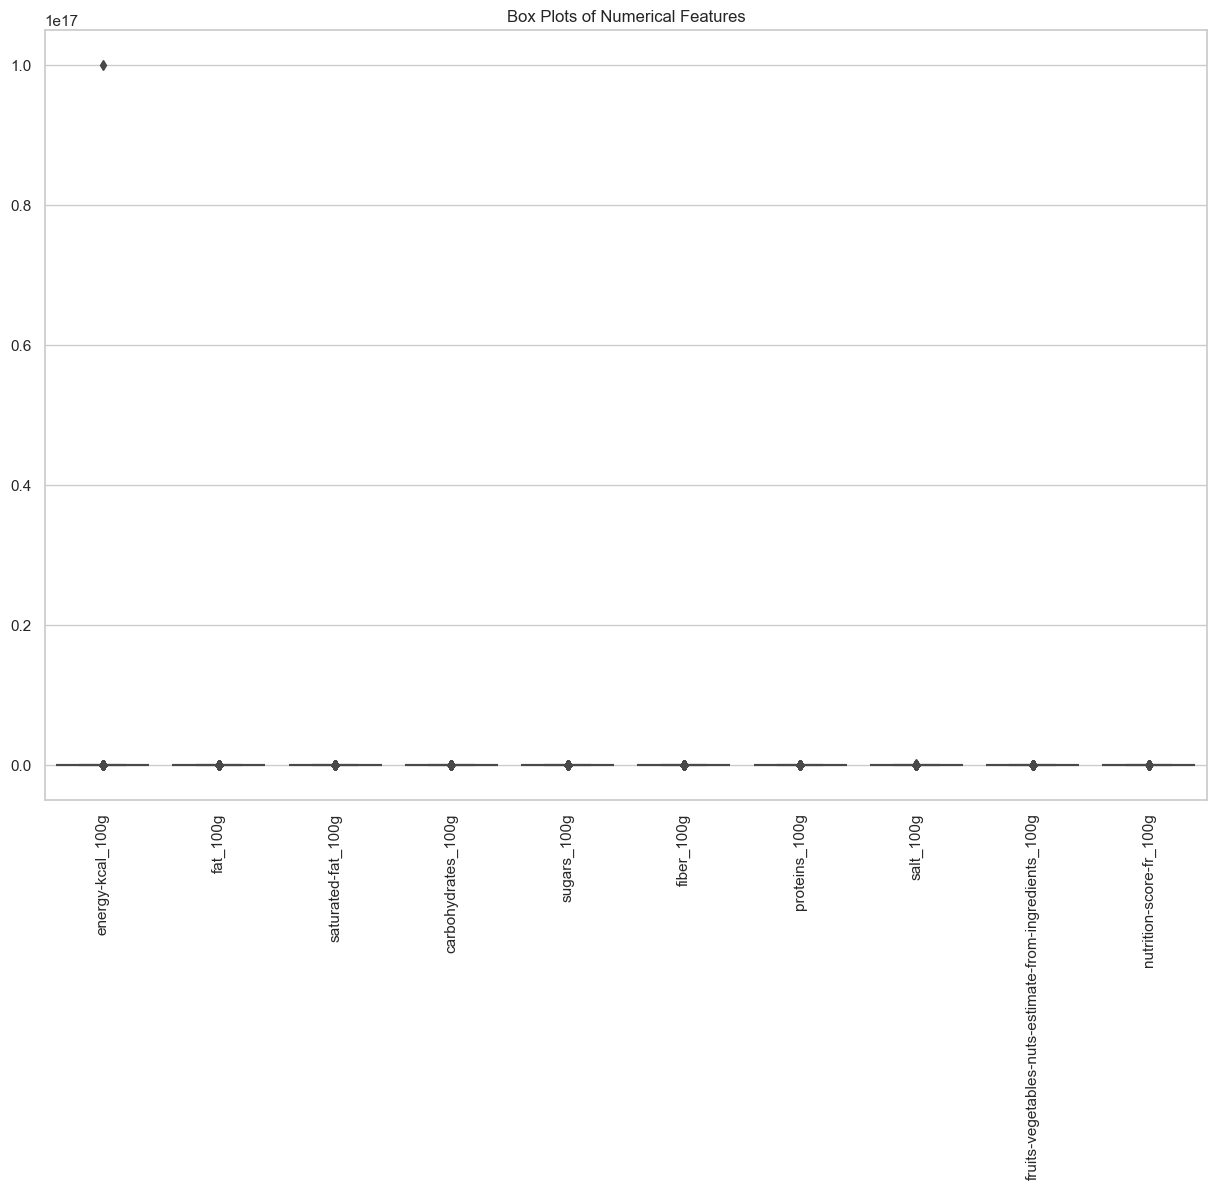

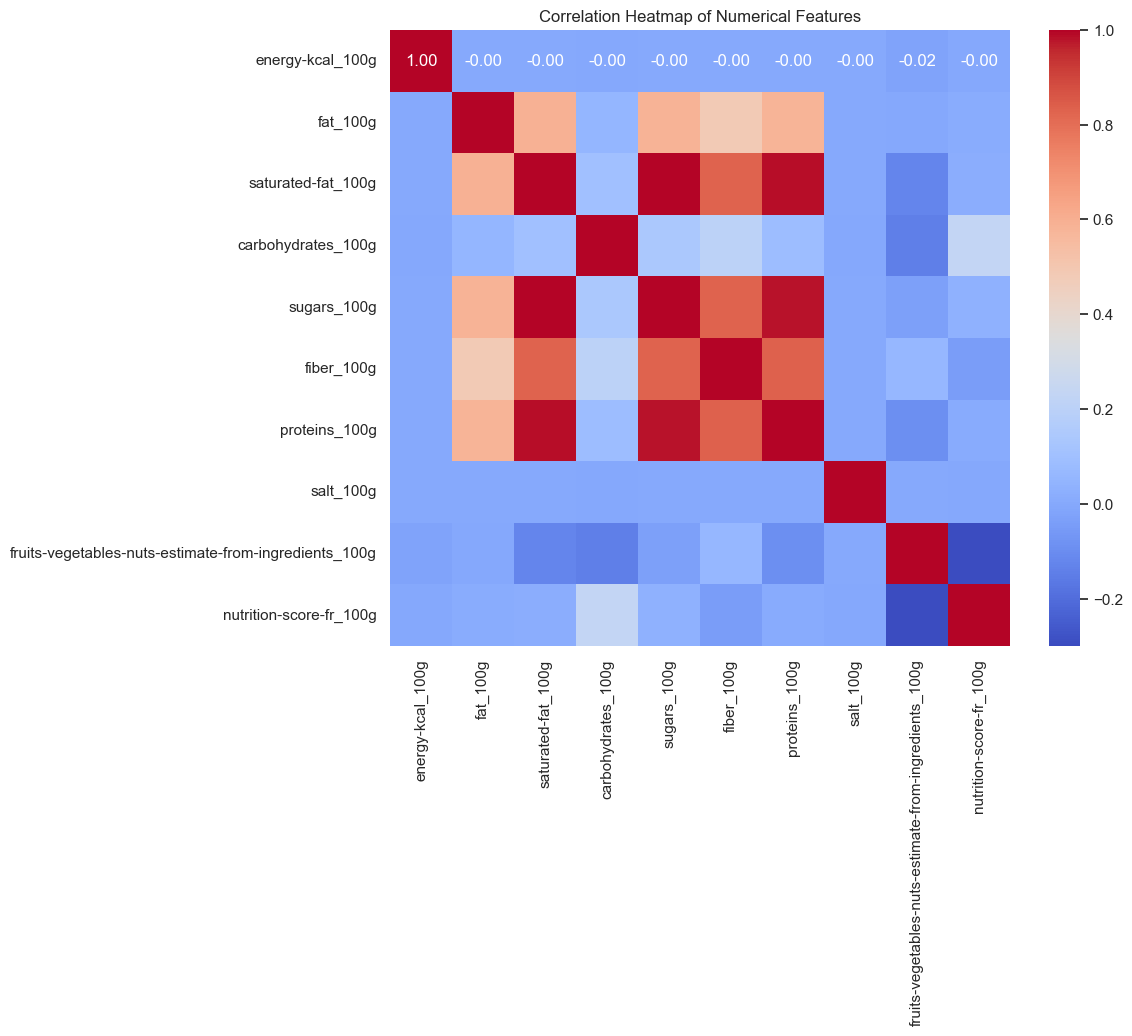

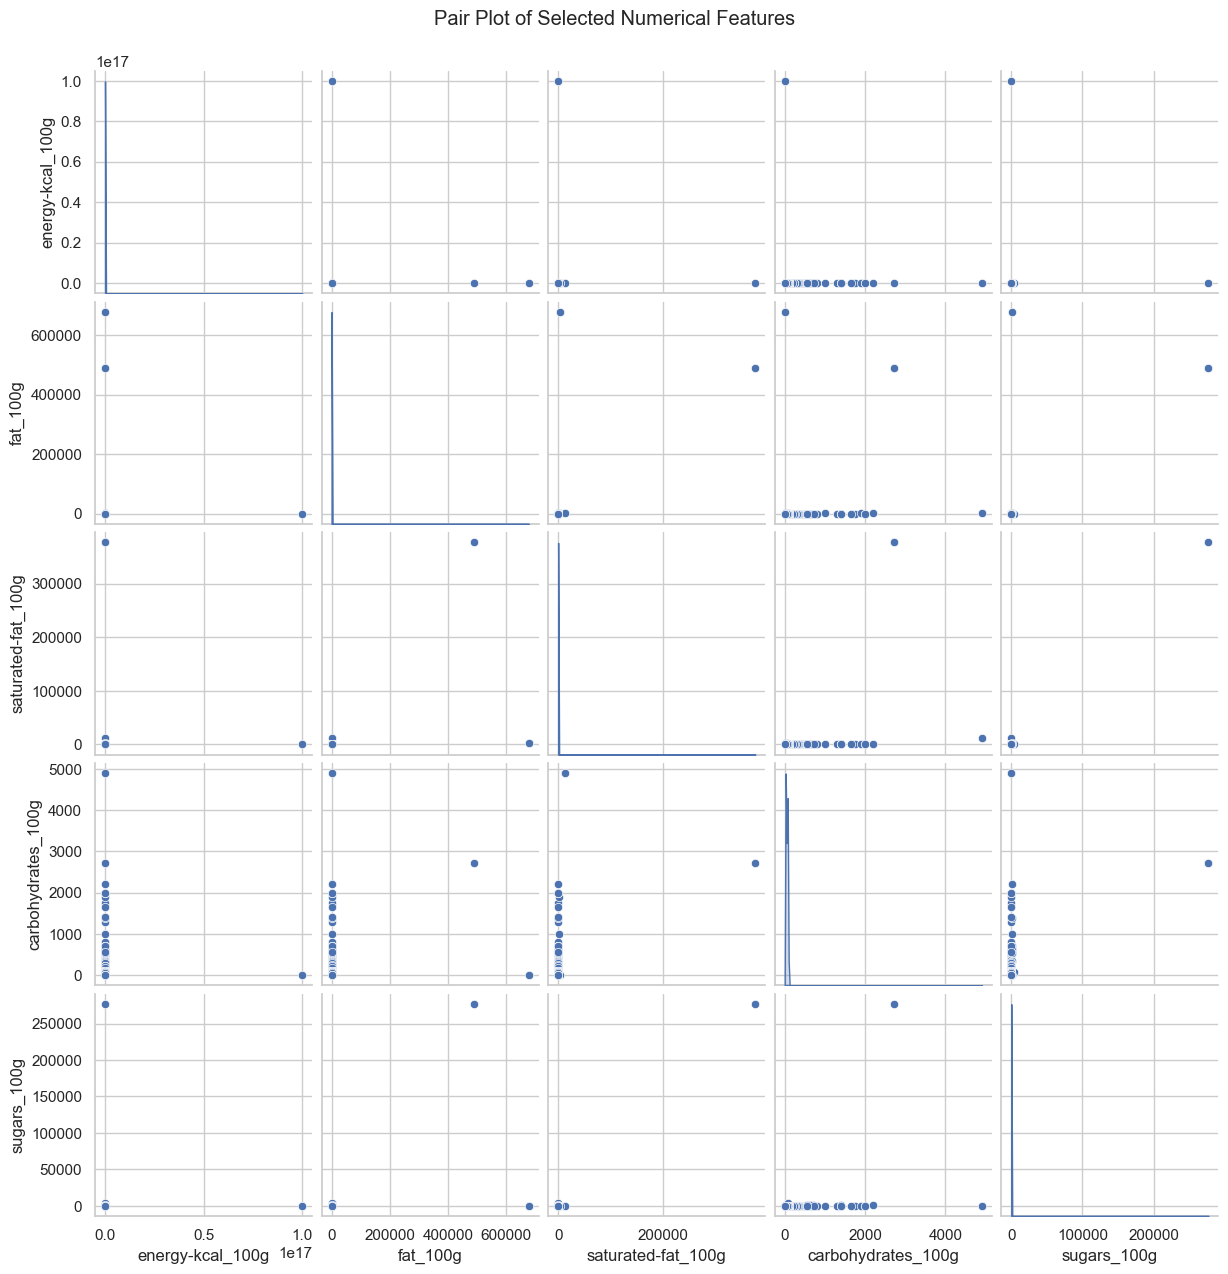

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style for the plots
sns.set(style="whitegrid")

# Boxplot for each numerical column to check for outliers
plt.figure(figsize=(15, 10))
sns.boxplot(data=numerical_data)
plt.title("Box Plots of Numerical Features")
plt.xticks(rotation=90)
plt.show()

# Correlation heatmap to visualize relationships between numerical features
plt.figure(figsize=(10, 8))
correlation_matrix = numerical_data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap of Numerical Features")
plt.show()

# Pair plot for a subset of features (you can select a few key columns if there are many)
selected_columns = numerical_data.columns[:5]  # Adjust based on how many you want to plot
sns.pairplot(numerical_data[selected_columns], diag_kind="kde")
plt.suptitle("Pair Plot of Selected Numerical Features", y=1.02)
plt.show()


### Observations on Numerical Data

From the initial exploration, we observed several key aspects of the numerical data:
1. **Realistic Value Limits**: Some columns contain values that exceed realistic limits for 100g servings, such as `energy-kcal_100g` with values beyond 900 kcal, which are implausible.
2. **Outliers**: There are extreme values in features like `fat_100g`, `saturated-fat_100g`, and `carbohydrates_100g`. These outliers need to be removed to prevent skewed results.
3. **Skewness**: Certain columns exhibit skewness, which could impact model performance. Applying a log transformation can help normalize these distributions.
4. **Missing Values**: Some columns have missing values, which will need to be imputed to ensure completeness in the dataset.

These observations guide our preprocessing steps for the numerical data to ensure it is well-prepared for modeling.


### Preprocessing Steps for Numerical Data

To clean and prepare the numerical data, we’ll apply the following preprocessing steps:
1. **Logical Threshold Filtering**: Define and apply maximum allowable values for each column based on realistic nutritional limits, such as capping `energy-kcal_100g` at 900.
2. **IQR-Based Outlier Removal**: Use the Interquartile Range (IQR) method to identify and remove outliers in each column, ensuring values fall within reasonable ranges.
3. **Log Transformation**: Apply a log transformation (`log1p`) to skewed columns like `fat_100g`, `saturated-fat_100g`, and `salt_100g` to reduce skewness.
4. **Median Imputation**: Impute missing values in each column using the median, which is robust against extreme values and preserves data consistency.

These preprocessing steps will result in a clean, normalized dataset that is ready for merging with the categorical data and subsequent model training.


In [7]:

from sklearn.impute import SimpleImputer

def preprocess_numerical_data(df):
    """
    Preprocesses the numerical data in a DataFrame by performing the following actions:
    1. Apply logical threshold filtering for realistic values per 100g.
    2. Remove outliers using the IQR method.
    3. Apply log transformation to skewed columns.
    4. Impute missing values using median imputation.
    
    Parameters:
    - df (DataFrame): DataFrame containing numerical features.
    
    Returns:
    - DataFrame: Cleaned and preprocessed numerical data.
    """
    # Copy the DataFrame to avoid modifying the original data
    df_numerical = df.copy()
    
    # Step 1: Apply logical threshold filtering
    # Define realistic limits for each column
    thresholds = {
        'energy-kcal_100g': 900,    # No more than 900 kcal per 100g
        'fat_100g': 100,            # No more than 100g of fat per 100g
        'saturated-fat_100g': 100,  # No more than 100g of saturated fat per 100g
        'carbohydrates_100g': 100,  # No more than 100g of carbs per 100g
        'sugars_100g': 100,         # No more than 100g of sugars per 100g
        'fiber_100g': 100,          # No more than 100g of fiber per 100g
        'proteins_100g': 100,       # No more than 100g of proteins per 100g
        'salt_100g': 100,           # No more than 100g of salt per 100g
        'fruits-vegetables-nuts-estimate-from-ingredients_100g': 100  # No more than 100g
    }
    
    # Apply threshold filtering
    for col, max_value in thresholds.items():
        if col in df_numerical.columns:
            df_numerical = df_numerical[df_numerical[col] <= max_value]
    
    # Step 2: Remove outliers using the IQR method
    def remove_outliers_iqr(df, column):
        """Removes outliers based on the IQR method for a given column."""
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

    # Apply IQR-based outlier removal to each column
    for col in df_numerical.columns:
        df_numerical = remove_outliers_iqr(df_numerical, col)
    
    # Step 3: Apply log transformation to skewed columns
    skewed_columns = ['fat_100g', 'saturated-fat_100g', 'salt_100g']
    for col in skewed_columns:
        if col in df_numerical.columns:
            # Apply log(1 + x) transformation to reduce skewness
            df_numerical[col] = np.log1p(df_numerical[col])
    
    # Step 4: Impute missing values with the median
    imputer = SimpleImputer(strategy='median')
    df_numerical = pd.DataFrame(imputer.fit_transform(df_numerical), columns=df_numerical.columns)
    
    # Return the cleaned and preprocessed DataFrame
    return df_numerical

# Example usage
df_numerical_cleaned = preprocess_numerical_data(numerical_data)
display(df_numerical_cleaned.describe())


,energy-kcal_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,fruits-vegetables-nuts-estimate-from-ingredients_100g,nutrition-score-fr_100g
count,248713.000000,248713.000000,248713.000000,248713.000000,248713.000000,248713.000000,248713.000000,248713.000000,248713.000000,248713.000000
mean,238.881723,1.803514,0.984431,31.535366,9.154277,2.068723,6.851451,0.496706,10.544212,6.536413
std,155.651520,1.121683,0.850631,26.212376,11.157313,2.196547,5.273699,0.380054,17.705186,7.835077
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-4.053013,-14.000000
25%,100.000000,0.916291,0.095310,7.700000,1.180000,0.000000,2.930000,0.113329,0.000000,0.000000
50%,226.000000,1.931521,0.887891,23.610000,3.600000,1.400000,6.200000,0.512824,0.505952,5.000000
75%,367.000000,2.772589,1.667707,55.000000,13.800000,3.300000,10.000000,0.788457,13.157895,13.000000
max,857.000000,3.916015,2.740840,100.000000,43.050000,9.000000,22.620000,1.370546,71.365792,32.000000


### Control Check: Previsualisation of Preprocessed Numerical Data (Numerical Only)

After preprocessing, we’ll verify the integrity of the numerical data by examining:
- The first and last rows for general consistency.
- Descriptive statistics to ensure no extreme outliers remain.
- Missing values to confirm imputation.
- The correlation matrix for relationships between features.
- Memory usage to check data efficiency.

This check will confirm that our numerical data is clean and ready for integration with the categorical data.



In [8]:
def previsualisation_numerical(df):
    """
    Provides a comprehensive overview of the numerical DataFrame.
    """
    display("### First five rows of the DataFrame:")
    display(df.head())
    
    display("\n### Last five rows of the DataFrame:")
    display(df.tail())
    
    display("\n### Descriptive statistics (Numerical features):")
    display(df.describe())
    
    display("\n### Column names, data types, and unique value counts:")
    display(pd.DataFrame({
        "Data Type": df.dtypes,
        "Unique Values": df.nunique()
    }))
    
    display("\n### Missing values (Count and Percentage):")
    missing_count = df.isnull().sum()
    missing_percentage = (missing_count / len(df)) * 100
    missing_info = pd.DataFrame({"Missing Count": missing_count, "Missing Percentage": missing_percentage})
    display(missing_info[missing_info["Missing Count"] > 0])
    
    display("\n### Correlation matrix (Numerical features only):")
    numeric_df = df.select_dtypes(include='number')  # Select only numerical columns
    display(numeric_df.corr())
    
    display("\n### Memory usage:")
    memory_usage = df.memory_usage(deep=True).sum() / (1024**2)
    display(f"{memory_usage:.2f} MB")

# Run the function to get a full overview of the cleaned numerical data
previsualisation_numerical(df_numerical_cleaned)


'### First five rows of the DataFrame:'

,energy-kcal_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,fruits-vegetables-nuts-estimate-from-ingredients_100g,nutrition-score-fr_100g
0,85.0,1.223775,0.741937,9.6,2.2,1.3,5.7,0.779830,0.000000,17.0
1,442.0,3.135494,1.280934,54.0,25.0,1.4,6.4,0.425268,22.666667,13.0
2,460.0,3.218876,1.945910,54.0,31.0,1.4,6.4,0.392042,16.250000,17.0
3,467.0,3.258097,1.960095,53.0,29.0,2.5,6.3,0.371564,16.250000,16.0
4,458.0,3.218876,1.945910,53.0,29.0,0.0,6.3,0.371564,16.250000,17.0


'\n### Last five rows of the DataFrame:'

,energy-kcal_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,fruits-vegetables-nuts-estimate-from-ingredients_100g,nutrition-score-fr_100g
248708,417.0,2.433613,1.642873,75.0,29.2,4.17,8.33,0.271553,11.795139,12.0
248709,247.0,2.714695,0.000000,15.3,0.0,0.00,15.30,0.498955,1.577148,0.0
248710,0.0,0.000000,0.000000,0.0,0.0,0.00,0.00,0.000000,0.000000,0.0
248711,0.0,0.000000,0.000000,0.0,0.0,0.00,0.00,0.000000,0.000000,0.0
248712,0.0,0.000000,0.000000,0.0,0.0,0.00,0.00,0.000000,0.000000,0.0


'\n### Descriptive statistics (Numerical features):'

,energy-kcal_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,fruits-vegetables-nuts-estimate-from-ingredients_100g,nutrition-score-fr_100g
count,248713.000000,248713.000000,248713.000000,248713.000000,248713.000000,248713.000000,248713.000000,248713.000000,248713.000000,248713.000000
mean,238.881723,1.803514,0.984431,31.535366,9.154277,2.068723,6.851451,0.496706,10.544212,6.536413
std,155.651520,1.121683,0.850631,26.212376,11.157313,2.196547,5.273699,0.380054,17.705186,7.835077
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-4.053013,-14.000000
25%,100.000000,0.916291,0.095310,7.700000,1.180000,0.000000,2.930000,0.113329,0.000000,0.000000
50%,226.000000,1.931521,0.887891,23.610000,3.600000,1.400000,6.200000,0.512824,0.505952,5.000000
75%,367.000000,2.772589,1.667707,55.000000,13.800000,3.300000,10.000000,0.788457,13.157895,13.000000
max,857.000000,3.916015,2.740840,100.000000,43.050000,9.000000,22.620000,1.370546,71.365792,32.000000


'\n### Column names, data types, and unique value counts:'

,Data Type,Unique Values
energy-kcal_100g,float64,6661
fat_100g,float64,5470
saturated-fat_100g,float64,3499
carbohydrates_100g,float64,9170
sugars_100g,float64,5698
fiber_100g,float64,2106
proteins_100g,float64,4126
salt_100g,float64,8858
fruits-vegetables-nuts-estimate-from-ingredients_100g,float64,61453
nutrition-score-fr_100g,float64,47


'\n### Missing values (Count and Percentage):'

,Missing Count,Missing Percentage


'\n### Correlation matrix (Numerical features only):'

,energy-kcal_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,fruits-vegetables-nuts-estimate-from-ingredients_100g,nutrition-score-fr_100g
energy-kcal_100g,1.000000,0.708974,0.530904,0.792841,0.392935,0.493736,0.326836,0.284089,-0.163007,0.496066
fat_100g,0.708974,1.000000,0.834257,0.241240,0.233672,0.235369,0.337393,0.433119,-0.060500,0.565260
saturated-fat_100g,0.530904,0.834257,1.000000,0.114198,0.328046,0.027056,0.217820,0.259410,-0.106125,0.680925
carbohydrates_100g,0.792841,0.241240,0.114198,1.000000,0.432996,0.519352,0.101794,0.040960,-0.196957,0.221292
sugars_100g,0.392935,0.233672,0.328046,0.432996,1.000000,0.103659,-0.210456,-0.147241,0.031655,0.559643
fiber_100g,0.493736,0.235369,0.027056,0.519352,0.103659,1.000000,0.224749,0.084031,0.054562,-0.143465
proteins_100g,0.326836,0.337393,0.217820,0.101794,-0.210456,0.224749,1.000000,0.323562,-0.185301,-0.061627
salt_100g,0.284089,0.433119,0.259410,0.040960,-0.147241,0.084031,0.323562,1.000000,0.003598,0.380899
fruits-vegetables-nuts-estimate-from-ingredients_100g,-0.163007,-0.060500,-0.106125,-0.196957,0.031655,0.054562,-0.185301,0.003598,1.000000,-0.106734
nutrition-score-fr_100g,0.496066,0.565260,0.680925,0.221292,0.559643,-0.143465,-0.061627,0.380899,-0.106734,1.000000


'\n### Memory usage:'

'18.98 MB'

### Control Check: Observations on Preprocessed Numerical Data

After running the `previsualisation` function, we observed the following:

1. **Logical Value Limits**:
   - The `energy-kcal_100g` column now has a max value of 857, confirming that unrealistic values above 900 have been successfully removed.
   - Other features like `fat_100g`, `saturated-fat_100g`, `carbohydrates_100g`, and `sugars_100g` also have reasonable max values within 100g, indicating effective threshold filtering.

2. **Outlier and Skewness Treatment**:
   - The `log1p` transformation has successfully reduced the range of skewed columns (`fat_100g`, `saturated-fat_100g`, `salt_100g`), making them less variable. The changes in distribution statistics confirm that the log transformation was applied correctly.

3. **Missing Values**:
   - There are no missing values in the numerical dataset, indicating that median imputation was completed successfully.

4. **Descriptive Statistics**:
   - The descriptive statistics display well-distributed values across all columns, with outliers managed through IQR filtering and logical thresholding.
   - For example, `fiber_100g` has a reasonable range without extreme values, and `nutrition-score-fr_100g` has a mean around 6.5, aligning with typical Nutri-Scores.

5. **Correlation Matrix**:
   - Strong correlations remain between `fat_100g` and `saturated-fat_100g`, as well as between `energy-kcal_100g` and `carbohydrates_100g`. We may consider addressing these in feature selection or dimensionality reduction.
   - `nutrition-score-fr_100g` shows moderate correlations with `fat_100g` and `saturated-fat_100g`, which could be valuable for prediction.

6. **Memory Usage**:
   - The data now occupies around 18.98 MB, a significant reduction from the initial size, indicating that unnecessary data was removed, improving memory efficiency.

### Next Steps

The numerical data appears clean and preprocessed, ready for merging with the categorical data. If this result is satisfactory, we can proceed to preprocess the categorical data or move on to merging the datasets for modeling.


### Categorical Data Exploration and Preprocessing

In this section, we will:
1. Explore each categorical feature in the dataset to understand its unique values, distribution, and missing data.
2. Visualize each feature using bar plots to assess its usefulness for the model.
3. Make informed decisions on whether to keep, simplify, or remove each feature.
4. For retained features, determine the appropriate encoding strategy.



Column: categories
Unique Values: 169155
Missing Values: 0.00%

Top 10 Most Frequent Values for categories:
categories
Snacks                                                                                                  26707
Snacks, Sweet snacks, Confectioneries                                                                   11424
Condiments, Sauces, Groceries                                                                           10470
Dairies, Fermented foods, Fermented milk products, Cheeses                                               9345
Snacks, Sweet snacks, Biscuits and cakes, Biscuits                                                       9162
Desserts, Frozen foods, Frozen desserts                                                                  7038
Plant-based foods and beverages, Plant-based foods, Cereals and potatoes, Breads                         6293
Frozen foods                                                                                             6286


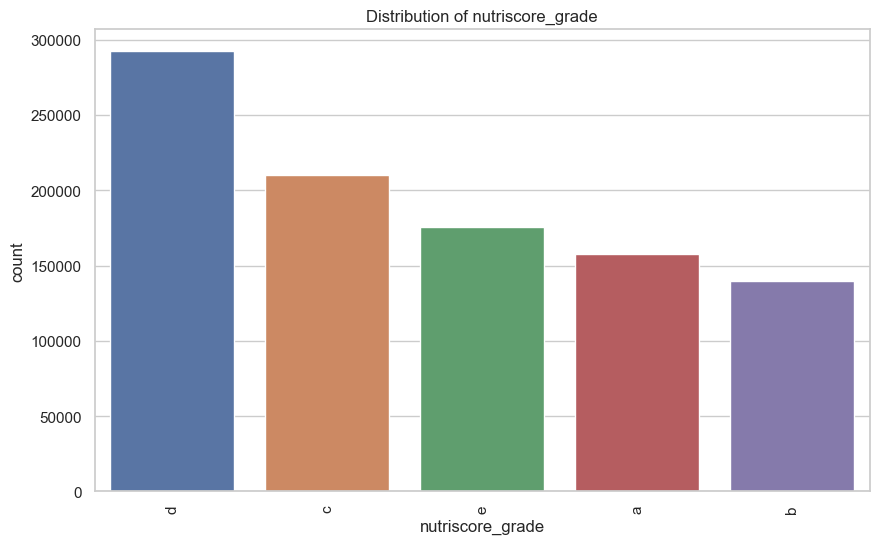


Column: pnns_groups_1
Unique Values: 10
Missing Values: 16.82%

Top 10 Most Frequent Values for pnns_groups_1:
pnns_groups_1
Sugary snacks              175835
Cereals and potatoes       111532
Milk and dairy products    107433
Fish Meat Eggs             103867
Fat and sauces              75548
Beverages                   67823
Composite foods             67634
Fruits and vegetables       52320
Salty snacks                49482
Alcoholic beverages            65
Name: count, dtype: int64


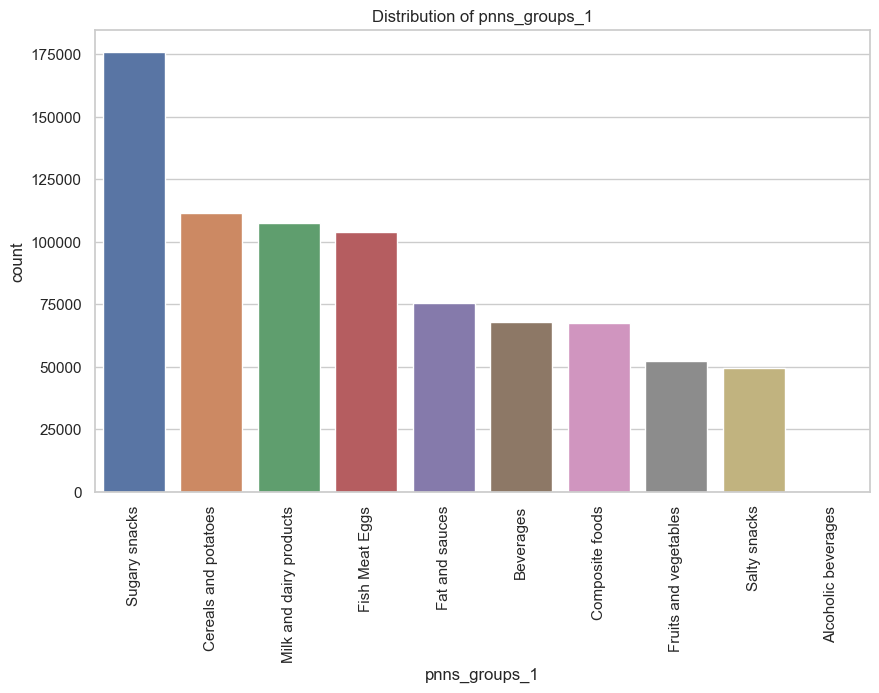


Column: pnns_groups_2
Unique Values: 39
Missing Values: 16.82%

Top 10 Most Frequent Values for pnns_groups_2:
pnns_groups_2
Biscuits and cakes      75138
Sweets                  71450
Dressings and sauces    54719
Cereals                 50063
One-dish meals          49112
Cheese                  46798
Processed meat          40603
Milk and yogurt         37458
Fish and seafood        31622
Bread                   30230
Name: count, dtype: int64


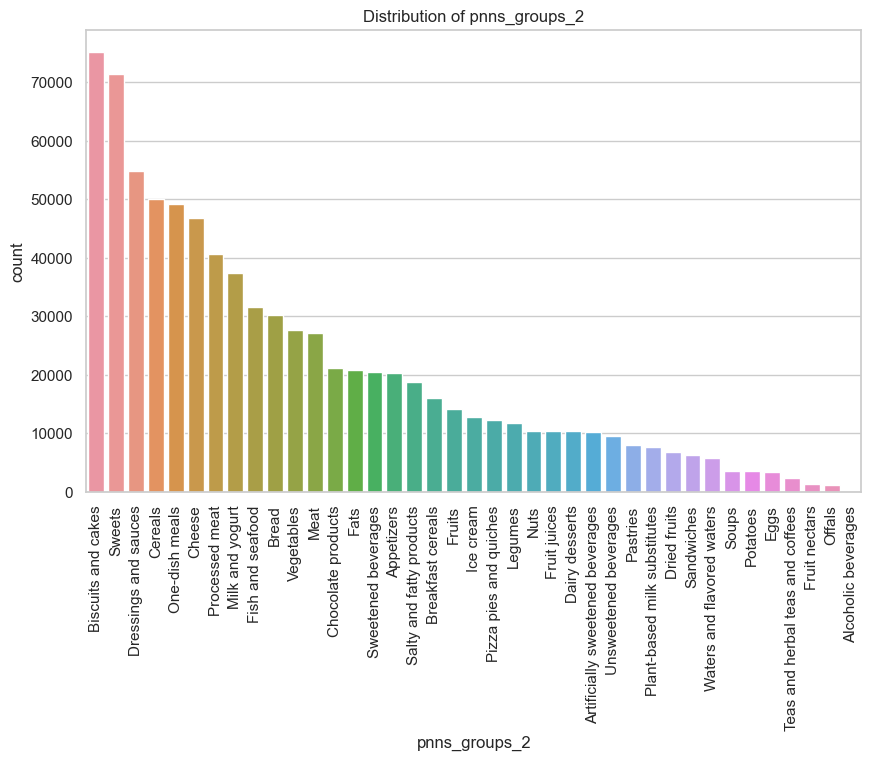


Column: food_groups
Unique Values: 46
Missing Values: 16.12%

Top 10 Most Frequent Values for food_groups:
food_groups
en:biscuits-and-cakes      75127
en:sweets                  71439
en:dressings-and-sauces    54713
en:cereals                 50047
en:one-dish-meals          48896
en:cheese                  46792
en:processed-meat          39444
en:milk-and-yogurt         36937
en:bread                   30227
en:vegetables              27470
Name: count, dtype: int64


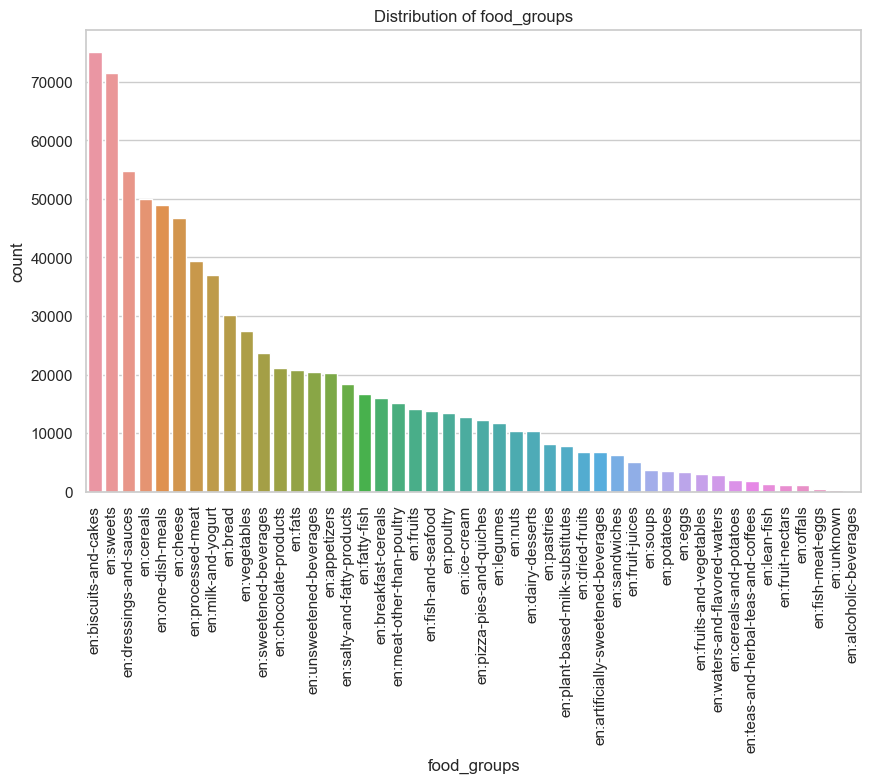

In [9]:

# Function to visualize categorical data and print unique values and missing data
def explore_categorical_data(df):
    for col in df.columns:
        # Display the unique values count and missing value percentage
        unique_count = df[col].nunique()
        missing_percentage = df[col].isnull().mean() * 100
        print(f"\nColumn: {col}")
        print(f"Unique Values: {unique_count}")
        print(f"Missing Values: {missing_percentage:.2f}%")
        
        # Display the top 10 most frequent values
        print(f"\nTop 10 Most Frequent Values for {col}:")
        print(df[col].value_counts().head(10))
        
        # Plot bar chart if the number of unique values is manageable
        if unique_count < 50:  # Adjust this threshold as needed
            plt.figure(figsize=(10, 6))
            sns.countplot(data=df, x=col, order=df[col].value_counts().index)
            plt.xticks(rotation=90)
            plt.title(f"Distribution of {col}")
            plt.show()
        else:
            print(f"Skipping bar plot for {col} due to high cardinality.")

# Run the function on the categorical data
explore_categorical_data(categorical_data)


## Observations on Categorical Data Distributions

### 1. **Target Variable - `nutriscore_grade`**
   - The `nutriscore_grade` variable is our target, representing the Nutri-Score grade of each product.
   - Distribution shows that the majority of products are graded as 'D', followed by 'C', 'E', 'A', and 'B'.
   - This imbalance suggests a need to handle class imbalance techniques if it affects model training.

### 2. **Multi-value Columns**
   - Several columns, including `categories`, `pnns_groups_1`, `pnns_groups_2`, and `food_groups`, contain multiple values in each cell, separated by commas.
   - Multi-value cells can be challenging for analysis and visualization, and they may not be properly utilized by machine learning algorithms.
   - These columns would benefit from **splitting and exploding**, which will:
      - **Enhance Visualization**: Transforming each value in a multi-value cell into its own row provides a clearer view of the distribution of unique categories.
      - **Improve Feature Engineering**: Each category can be treated individually, facilitating feature encoding and aggregation as needed for model input.

### 3. **High Cardinality Columns**
   - `categories` has a very high number of unique values (169,155), which might introduce noise if used directly without filtering or grouping.
   - `pnns_groups_1` and `pnns_groups_2` have a manageable number of unique values (10 and 39, respectively), making them more practical for visualization and direct use in modeling.
   - `food_groups`, while having fewer unique values (46), still covers a broad range of categories, which might be useful if properly exploded and encoded.

### 4. **Missing Values**
   - **`pnns_groups_1`**: 16.82% missing values.
   - **`pnns_groups_2`**: 16.82% missing values.
   - **`food_groups`**: 16.12% missing values.
   - Handling these missing values will be necessary after exploding to ensure consistent data across all rows. Imputation with a placeholder like 'unknown' or removing rows (if they contribute minimal information) can be considered.


## Next Steps for Data Processing

1. **Splitting and Exploding Multi-value Columns**
   - Apply splitting and exploding to the `categories`, `pnns_groups_1`, `pnns_groups_2`, and `food_groups` columns.
   - Retain `nutriscore_grade` as it is, as this is our target variable.


In [10]:


# Removing 'nutriscore_grade' from categorical_data
categorical_data = categorical_data.drop(columns=['nutriscore_grade'])

# Remove prefixes like 'en:' from columns that may have them
for column in categorical_data.columns:
    categorical_data[column] = categorical_data[column].str.replace(r'^en:', '', regex=True)

# Splitting and exploding columns with multiple values
for column in ['categories', 'pnns_groups_1', 'pnns_groups_2', 'food_groups']:
    if column in categorical_data.columns:
        # Split the column on commas, then explode
        categorical_data[column] = categorical_data[column].str.split(',')
        categorical_data = categorical_data.explode(column).reset_index(drop=True)

# Display the first few rows to confirm the transformations
display(categorical_data.head())

,categories,pnns_groups_1,pnns_groups_2,food_groups
0,Proteinpulver,NaN,NaN,NaN
1,Dark chocolate bar,Sugary snacks,Chocolate products,chocolate-products
2,Gemüse,Fruits and vegetables,Vegetables,vegetables
3,Beverages and beverages preparations,Beverages,Artificially sweetened beverages,artificially-sweetened-beverages
4,Plant-based foods and beverages,Beverages,Artificially sweetened beverages,artificially-sweetened-beverages


## Exploring the Transformed Categorical Data

Following the recent transformations of splitting and exploding multi-value columns, 
we'll now run `explore_categorical_data` to visualize and analyze the structure 
and distribution of each categorical feature in `categorical_data`. This function 
will help us:
- Assess the distribution of values across categories.
- Identify any remaining missing values or irregularities after transformation.



Column: categories
Unique Values: 94284
Missing Values: 0.00%

Top 10 Most Frequent Values for categories:
categories
Snacks                                     152568
Aliments et boissons à base de végétaux    105036
Plant-based foods and beverages            103872
 Aliments d'origine végétale                87190
 Plant-based foods                          80299
 Snacks sucrés                              54751
 Sweet snacks                               52165
Condiments                                  44305
Viandes et dérivés                          40857
 Sauces                                     40844
Name: count, dtype: int64
Skipping bar plot for categories due to high cardinality.

Column: pnns_groups_1
Unique Values: 10
Missing Values: 7.23%

Top 10 Most Frequent Values for pnns_groups_1:
pnns_groups_1
Sugary snacks              952485
Cereals and potatoes       717755
Milk and dairy products    647740
Fish Meat Eggs             555497
Fruits and vegetables      412510
Fa

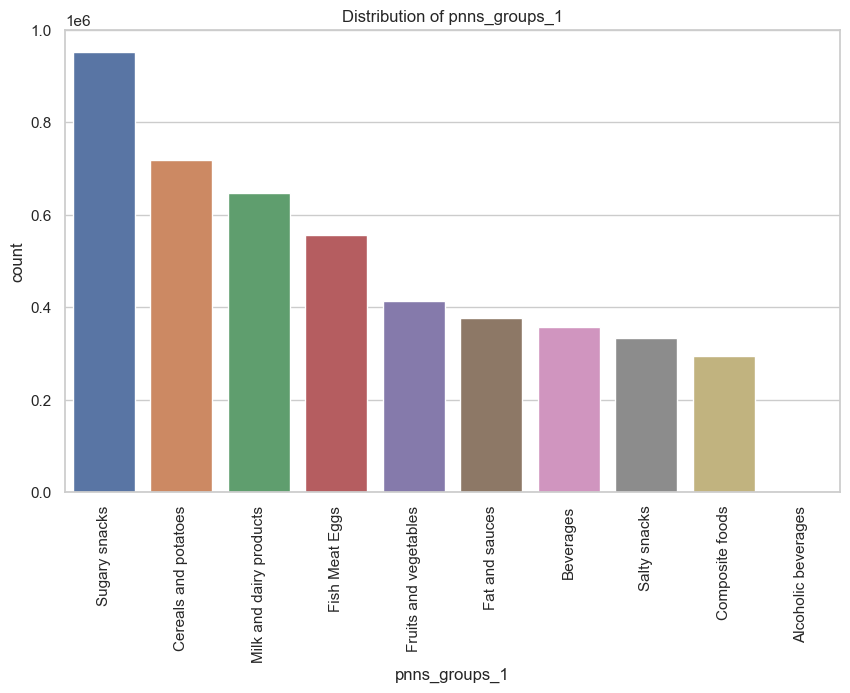


Column: pnns_groups_2
Unique Values: 39
Missing Values: 7.23%

Top 10 Most Frequent Values for pnns_groups_2:
pnns_groups_2
Sweets                  417909
Biscuits and cakes      368667
Cereals                 329696
Cheese                  272458
Milk and yogurt         242827
Dressings and sauces    233799
Vegetables              222588
One-dish meals          220687
Processed meat          206005
Fish and seafood        183333
Name: count, dtype: int64


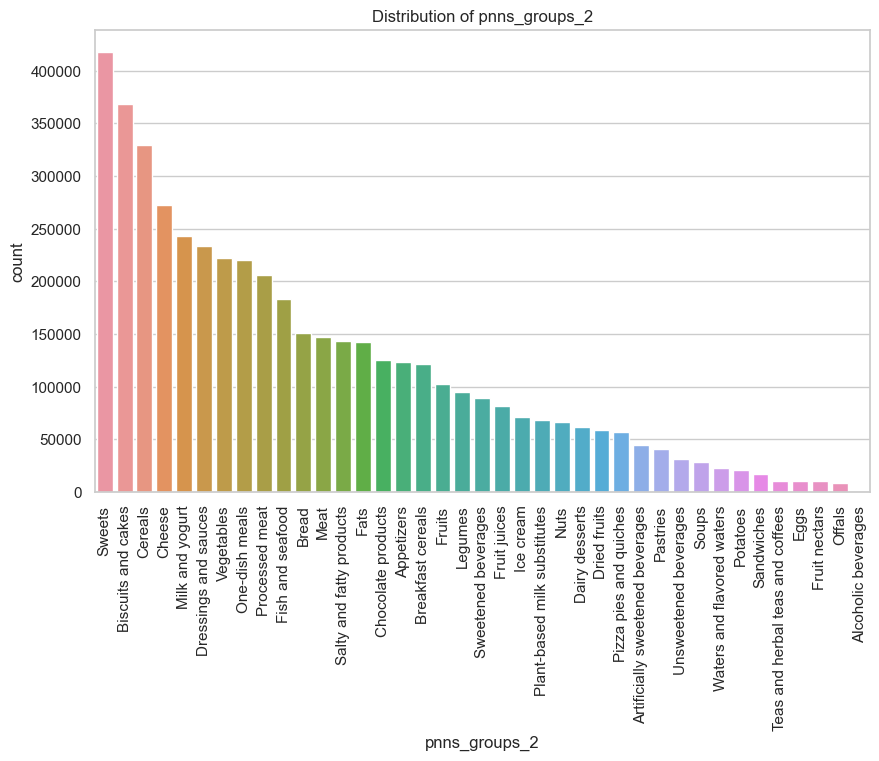


Column: food_groups
Unique Values: 46
Missing Values: 6.67%

Top 10 Most Frequent Values for food_groups:
food_groups
sweets                  417816
biscuits-and-cakes      368550
cereals                 329557
cheese                  272409
milk-and-yogurt         238127
dressings-and-sauces    233770
vegetables              220282
one-dish-meals          218348
processed-meat          196048
bread                   150660
Name: count, dtype: int64


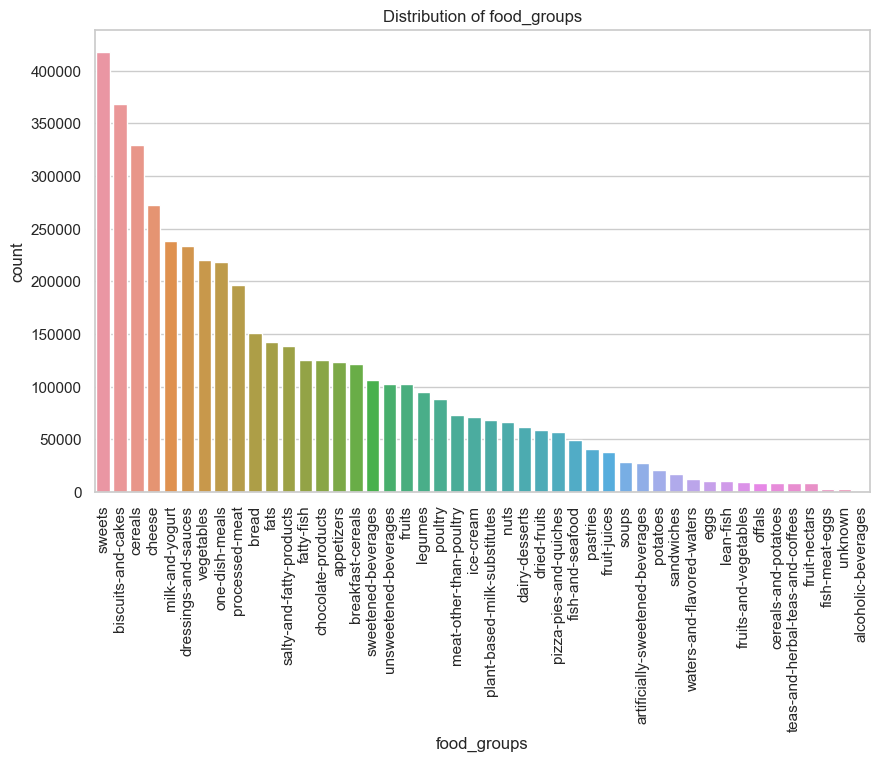

In [11]:
# Run the function on the categorical data
explore_categorical_data(categorical_data)


## Observations
#### Distribution of Categorical Features:

#### The food_groups, pnns_groups_1, and pnns_groups_2 columns show distributions with clear high-frequency categories, such as "sweets," "biscuits-and-cakes," and "Sugary snacks."
Some categories still contain the prefix en:, indicating a need for additional cleaning.
Missing Values:

#### There are still missing values in pnns_groups_1, pnns_groups_2, and food_groups.
Missing values in these columns may need to be handled based on the project requirements, possibly by filling them with "unknown" or other imputation strategies.
Unique Values in Categorical Columns:

#### The categories column has a high cardinality (many unique values), which could make visualization challenging. This might require grouping similar categories together to reduce cardinality if needed.
Next Steps for Further Processing
Remove Remaining Prefixes:

Ensure any remaining prefixes such as en: are removed from all relevant columns to keep the values consistent.
#### Handling Missing Values:

#### For columns with high missing values like pnns_groups_1, pnns_groups_2, and food_groups, consider filling missing values with a placeholder like "unknown" to ensure consistency across rows.
Reduce High Cardinality:


## Preprocess Categorical Data

##### Remove Prefixes: Strips prefixes like en: from all categorical columns to standardize entries.
##### Fill Missing Values: Replaces all missing values in the categorical columns with 'unknown', ensuring there are no null entries.
##### Standardize Category Names: Removes extra spaces and converts all text to lowercase, making the values uniform and easier to work with.
##### Remove Duplicates: Drops duplicate rows that may have been introduced from previous splitting and exploding steps.

In [12]:
def preprocess_categorical_data(df):
    """
    Preprocesses specific categorical data in the DataFrame, excluding the 'categories' column.
    The function performs the following:
    1. Removes unnecessary prefixes like 'en:'.
    2. Fills missing values with 'unknown' for columns other than 'categories'.
    3. Standardizes text by stripping whitespace and converting to lowercase.
    4. Drops duplicate rows to maintain consistency.
    
    Parameters:
        df (DataFrame): The input DataFrame with categorical columns.
        
    Returns:
        DataFrame: The preprocessed DataFrame.
    """
    
    # Remove prefixes like 'en:' from relevant columns (excluding 'categories')
    for column in df.columns:
        if column != 'categories':
            df[column] = df[column].str.replace(r'^en:', '', regex=True)
    
    # Fill missing values with 'unknown' for columns other than 'categories'
    df.loc[:, df.columns != 'categories'] = df.loc[:, df.columns != 'categories'].fillna('unknown')
    
    # Standardize text: strip whitespace and convert to lowercase, excluding 'categories'
    for column in df.columns:
        if column != 'categories':
            df[column] = df[column].str.strip().str.lower()
    
    # Remove duplicate rows if any
    df = df.drop_duplicates().reset_index(drop=True)
    
    # Display first few rows to confirm transformations
    display(df.head())
    
    return df

# Apply the function to preprocess categorical data, excluding 'categories'
categorical_data = preprocess_categorical_data(categorical_data)


,categories,pnns_groups_1,pnns_groups_2,food_groups
0,Proteinpulver,unknown,unknown,unknown
1,Dark chocolate bar,sugary snacks,chocolate products,chocolate-products
2,Gemüse,fruits and vegetables,vegetables,vegetables
3,Beverages and beverages preparations,beverages,artificially sweetened beverages,artificially-sweetened-beverages
4,Plant-based foods and beverages,beverages,artificially sweetened beverages,artificially-sweetened-beverages



Column: categories
Unique Values: 94284
Missing Values: 0.00%

Top 10 Most Frequent Values for categories:
categories
Plant-based foods and beverages            72
Aliments et boissons à base de végétaux    72
 Aliments d'origine végétale               63
 Plant-based foods                         61
 Surgelés                                  60
Pflanzliche Lebensmittel und Getränke      53
 Frozen foods                              50
 Snacks                                    50
Alimentos y bebidas de origen vegetal      50
Cibi e bevande a base vegetale             49
Name: count, dtype: int64
Skipping bar plot for categories due to high cardinality.

Column: pnns_groups_1
Unique Values: 11
Missing Values: 0.00%

Top 10 Most Frequent Values for pnns_groups_1:
pnns_groups_1
unknown                    29110
sugary snacks              17335
cereals and potatoes       16316
beverages                  14649
fish meat eggs             13507
milk and dairy products    12331
composite food

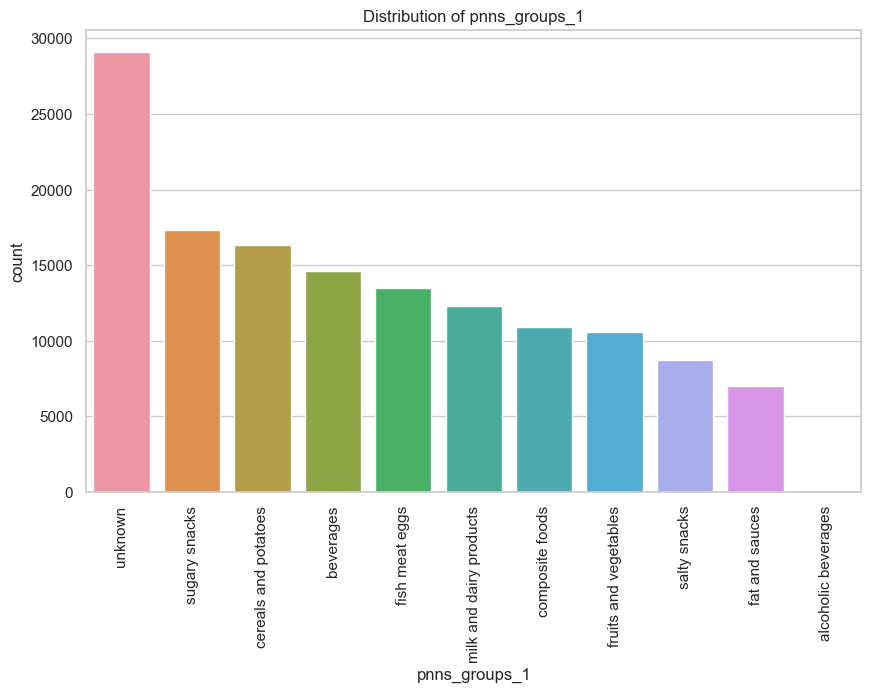


Column: pnns_groups_2
Unique Values: 40
Missing Values: 0.00%

Top 10 Most Frequent Values for pnns_groups_2:
pnns_groups_2
unknown                 29110
one-dish meals           7727
cereals                  7263
biscuits and cakes       7044
sweets                   6242
vegetables               5253
milk and yogurt          4953
dressings and sauces     4813
fish and seafood         4331
processed meat           4324
Name: count, dtype: int64


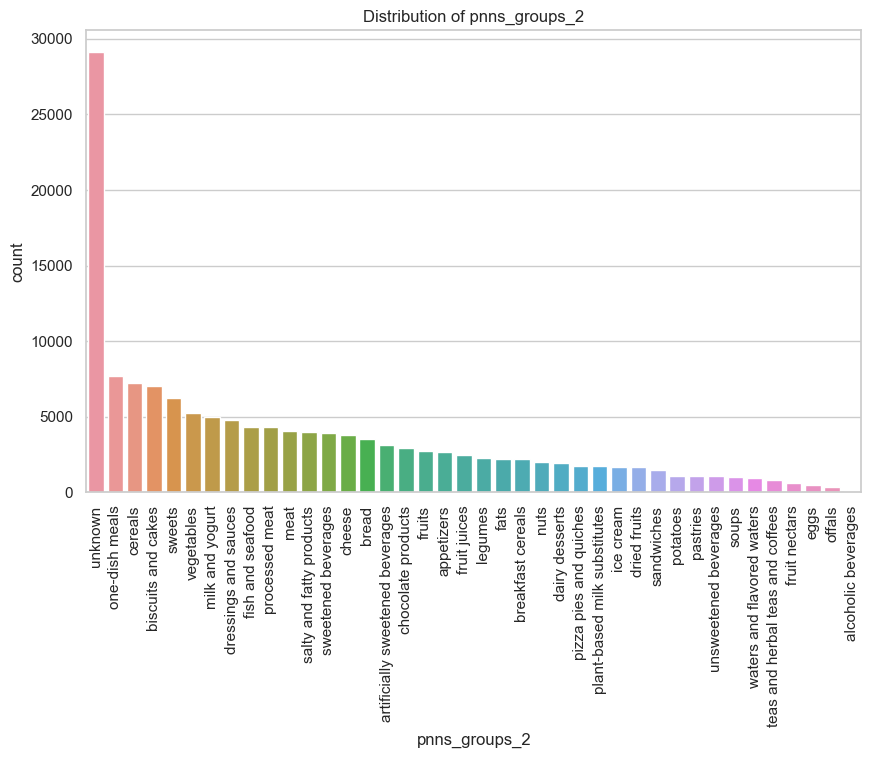


Column: food_groups
Unique Values: 46
Missing Values: 0.00%

Top 10 Most Frequent Values for food_groups:
food_groups
unknown                  28203
one-dish-meals            7446
cereals                   7159
biscuits-and-cakes        6952
sweets                    6152
sweetened-beverages       5431
vegetables                5042
dressings-and-sauces      4794
milk-and-yogurt           4352
unsweetened-beverages     4277
Name: count, dtype: int64


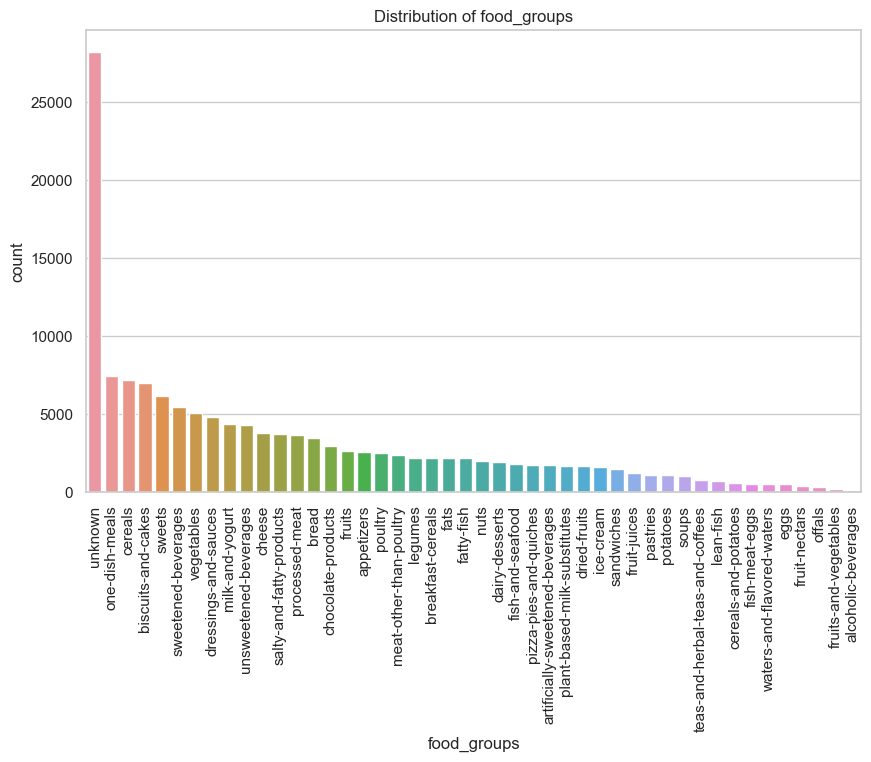

In [13]:
# Run the function on the categorical data
explore_categorical_data(categorical_data)

## Reflection on Preprocessing Steps for Categorical Data

### Observations:
1. **High Count of "Unknown" Values**:
   - The high number of "unknown" values in `pnns_groups_1`, `pnns_groups_2`, and `food_groups` suggests that the original dataset had many missing or inconsistent entries for these columns. This may be expected when working with datasets from diverse sources or regions where specific classifications aren't always applicable or provided.

2. **High Cardinality in `categories`**:
   - Choosing to leave the `categories` column untouched was a good decision, as it has over 94,000 unique values. Its high cardinality makes it challenging to process directly. For modeling purposes, encoding methods such as one-hot encoding on grouped categories or using word embeddings could be considered in future steps.

3. **Label Consistency**:
   - The standardization of labels in `pnns_groups_1`, `pnns_groups_2`, and `food_groups` has reduced variability, making these columns easier to analyze and use in modeling. However, further grouping could be beneficial.

###  Further Steps:
1. **Hierarchical Grouping**:
   - To simplify analysis and reduce the number of unique values in `pnns_groups_1` and `pnns_groups_2`, consider hierarchical grouping where possible. For example, categories like `sweets`, `biscuits`, and `chocolates` could be consolidated under a broader "Confectionery" category.

2. **Alternative Imputation for Missing Values**:
   - Instead of using "unknown" for all missing values, context-based imputation could provide better data quality. For instance, if `pnns_groups_1` is labeled as "Beverages," then `pnns_groups_2` could potentially be imputed as either "Sweetened beverages" or "Unsweetened beverages" based on the sugar content column.

This reflection should help guide future preprocessing decisions and serve as a reminder for handling high-cardinality and missing data in categorical features.


### Merging Numerical and Categorical Data

In this step, we merged the `numerical_data` and `categorical_data` DataFrames to create a single dataset. This combined dataset includes both numerical and categorical features, making it ready for further analysis or modeling. The merged data is saved as a CSV file for easy access and future use.

#### Steps:
1. **Merge the DataFrames**: We used `pd.concat` to merge `numerical_data` and `categorical_data` along the columns (axis=1), ensuring all features are combined side-by-side.
2. **Preview the Merged Data**: Display the first few rows of the merged dataset to verify the structure.
3. **Save the Merged Data**: The combined DataFrame is saved as `merged_data.csv` for future analysis.



In [23]:

# Assuming it was originally part of the categorical data
if 'nutriscore_grade' not in categorical_data.columns:
    # If needed, add 'nutriscore_grade' from a backup or derived from the existing data
    categorical_data['nutriscore_grade'] = df_reduced_2['nutriscore_grade']

# Step 1: Ensure both DataFrames have the same number of rows by checking row counts
if len(categorical_data) != len(numerical_data):
    print("Warning: Row counts do not match. Aligning indices to avoid introducing missing values.")

# Step 2: Remove any extra rows in categorical or numerical data to align both
common_index = categorical_data.index.intersection(numerical_data.index)
df_categorical_cleaned = categorical_data.loc[common_index].copy()
df_numerical_cleaned = numerical_data.loc[common_index].copy()

# Step 3: Merge on index, ensuring no new missing values are introduced
df_merged_cleaned = pd.concat([df_categorical_cleaned, df_numerical_cleaned], axis=1)

# Step 4: Remove rows that contain only missing values (in case any remain after the merge)
df_merged_cleaned.dropna(how='all', inplace=True)

# Step 5: Preview the cleaned and merged DataFrame
print("Preview of the merged cleaned data without extra missing values:")
print(df_merged_cleaned.head())

# Step 6: Save the final cleaned DataFrame
output_path = "C:/data/simplon_dev_ia_projects/flask_projects/nutriscore_prediction_app/data/f_merged_cleaned.csv"
df_merged_cleaned.to_csv(output_path, index=False)
print(f"Data successfully saved to {output_path}")



Preview of the merged cleaned data without extra missing values:
                             categories          pnns_groups_1  \
0                         Proteinpulver                unknown   
1                    Dark chocolate bar          sugary snacks   
2                                Gemüse  fruits and vegetables   
3  Beverages and beverages preparations              beverages   
4       Plant-based foods and beverages              beverages   

                      pnns_groups_2                       food_groups  \
0                           unknown                           unknown   
1                chocolate products                chocolate-products   
2                        vegetables                        vegetables   
3  artificially sweetened beverages  artificially-sweetened-beverages   
4  artificially sweetened beverages  artificially-sweetened-beverages   

  nutriscore_grade  energy-kcal_100g   fat_100g  saturated-fat_100g  \
0                d          